### Importing Libraries

In [42]:
import pandas as pd
import utils


from nltk.corpus import stopwords
import pandas as pd
import nltk
import re

# Download the stopwords dataset if you haven't already
# nltk.download('stopwords')
# nltk.download('punkt')

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu



import math

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parsing the Columns

In [59]:
name = 'tech'
bottom_channels = pd.read_csv(f"./{name}/bottom_{name}_vid.csv", index_col = 0)
bottom_channels = utils.parse_cols(bottom_channels)


top_channels = pd.read_csv(f"./{name}/top_{name}_vid.csv", index_col = 0)
top_channels = utils.parse_cols(top_channels)

# Autos: 2 reject, 15220, 13595
# Shows: 1st only reject, 15147, 13296
# Travel: 2 reject, 10809, 9810
# Sports: 1st only reject, 16272, 14143
# Tech: 2 reject, 12765, 11179

Total rows before parsing: 7363
Parser dropped 2 rows during 'publishedAt' parsing


/home/yuvi_dh/side_projects/Projects/smr_yt/eda_nbs/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A"))
/home/yuvi_dh/side_projects/Projects/smr_yt/eda_nbs/utils.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/home/yuvi_dh/side_projects/Projects/smr_yt/eda_nbs/utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Parser dropped 1 rows during 'viewCount' parsing
Total rows after parsing: 7358
Total rows before parsing: 5410
Parser dropped 0 rows during 'publishedAt' parsing
Parser dropped 0 rows during 'viewCount' parsing
Total rows after parsing: 5407


In [52]:
# 15220+15147+10809+16272+12765 = 70213 # Before Outliers
# 13595+13296+9810+14143+11179 = 62023 # After Outliers

### Describing the Data

In [60]:
bottom_channels.shape, top_channels.shape

((7358, 20), (5407, 20))

### Adding the popularity Column and combining the popular and unpopular dataframes

In [61]:
bottom_channels = utils.add_pop_unpop_col(bottom_channels, False)
top_channels = utils.add_pop_unpop_col(top_channels, True)

In [62]:
comb_vids = utils.combine_pop_unpop_df(top_channels, bottom_channels)

### Removing the Outliers of the Data

In [63]:
# Remove outliers from the dataframe
cleaned_dataframe = utils.remove_outliers(comb_vids)
print(comb_vids.shape, cleaned_dataframe.shape)

(12765, 21) (11179, 21)


In [64]:
df = cleaned_dataframe
df_sorted = df.sort_values(by=['channelTitle', 'publishingYear'])

# Group by 'channelTitle', 'publishingYear', and 'pop_unpop', and calculate count and mean duration
grouped_data = df_sorted.groupby(['channelTitle', 'publishingYear', 'pop_unpop'])['durationSecs'].agg(['count', 'mean']).reset_index()

# Rename columns for clarity
grouped_data.columns = ['channelTitle', 'publishingYear', 'pop_unpop', 'num_videos', 'average_duration_secs']

# Convert duration from seconds to minutes
grouped_data['average_duration_mins'] = grouped_data['average_duration_secs'] / 60

# Drop the 'average_duration_secs' column
grouped_data.drop(columns=['average_duration_secs'], inplace=True)

# Sort the DataFrame by 'channelTitle' and 'publishingYear' within each 'channelTitle' group
average_duration_sorted = grouped_data.groupby('channelTitle').apply(lambda x: x.sort_values('publishingYear')).reset_index(drop=True)

# Sort the DataFrame by 'average_duration_mins' within each 'channelTitle' group
average_duration_sorted = average_duration_sorted.groupby('channelTitle').apply(lambda x: x.sort_values('average_duration_mins')).reset_index(drop=True)

# Print the resulting DataFrame
average_duration_sorted.to_csv(f'{name}_avg_duration.csv')

/tmp/ipykernel_1079/2435934523.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  average_duration_sorted = grouped_data.groupby('channelTitle').apply(lambda x: x.sort_values('publishingYear')).reset_index(drop=True)


### Splitting the columns into 2 Chunks each having popular and unpopular channels on the base of mean of views

In [ ]:
# chunklow_ch_names, chunkhigh_ch_names = utils.split_and_merge_by_views(comb_autos_info)
# chunklow_ch_names.channelName.tolist(), chunkhigh_ch_names.channelName.tolist()

# summed_views_df, mean_views_popular, mean_views_unpopular, popular_below_mean, popular_above_mean, unpopular_below_mean, unpopular_above_mean = utils.pop_unpop_chunks(cleaned_dataframe)

# above_mean_chunk = popular_above_mean + unpopular_above_mean
# below_mean_chunk = popular_below_mean + unpopular_below_mean


# print("Mean views of popular channels: ", mean_views_popular)
# print("Mean views of unpopular channels: ", mean_views_unpopular)

# print(f"Popular channel names with views above mean: {(popular_above_mean)}")
# print(f"Popular channel names with views below mean: {(popular_below_mean)}")
# print(f"UnPopular channel names with views above mean: {(unpopular_above_mean)}")
# print(f"UnPopular channel names with views above mean: {(unpopular_below_mean)}")

### App Running 

In [ ]:
# # Run the first App to see the growth of views over the years for above mean chunk
# app = plots.dynamic_view_plots(cleaned_dataframe)
# app.run_server(debug=True, use_reloader=False, mode="inline", port=23000)

In [ ]:
# percentiles = ['.25', '.5', '.75', '.9', '.95', '.99']
# app_2 = plots.percentiles_plot(cleaned_dataframe, percentiles=percentiles)
# app_2.run_server(debug=True, use_reloader=False, mode="inline", port=23001)

### Numerical Analysis

#### QQ Plots && Distribution Plots

In [ ]:
df = cleaned_dataframe
# recent_years = df['publishingYear'].isin([2023, 2022,2021])
# df = df[recent_years]

# Assuming your DataFrame is named 'df'
# Separate data for popular and unpopular channels
popular_views = df[df['pop_unpop'] == 1]['viewCount']
unpopular_views = df[df['pop_unpop'] == 0]['viewCount']

# Create Q-Q plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(popular_views, line='s', color='blue', ax=axs[0])
axs[0].set_title('Q-Q Plot - Popular Channels')

sm.qqplot(unpopular_views, line='s', color='orange', ax=axs[1])
axs[1].set_title('Q-Q Plot - Unpopular Channels')

plt.tight_layout()
plt.show()

In [ ]:
df = cleaned_dataframe

# Separate data for popular and unpopular channels
popular_df = df[df['pop_unpop'] == 1]
unpopular_df = df[df['pop_unpop'] == 0]

# Plotting the distribution of viewCount for popular channels
plt.figure(figsize=(10, 6))
plt.hist(popular_df['viewCount'], bins=50, color='blue', alpha=0.7, label='Popular Channels')
plt.title('Distribution of viewCount for Popular Channels')
plt.xlabel('viewCount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of viewCount for unpopular channels
plt.figure(figsize=(10, 6))
plt.hist(unpopular_df['viewCount'], bins=50, color='red', alpha=0.7, label='Unpopular Channels')
plt.title('Distribution of viewCount for Unpopular Channels')
plt.xlabel('viewCount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
df = cleaned_dataframe

popular_df = df[df['pop_unpop']==1]
unpopular_df = df[df['pop_unpop']==0]

# Group by channelTitle and calculate the mean view count for each channel
popular_mean_view = popular_df.groupby('channelTitle')['viewCount'].mean().reset_index()
popular_mean_view['pop_unpop'] = 1
unpopular_mean_view = unpopular_df.groupby('channelTitle')['viewCount'].mean().reset_index()
unpopular_mean_view['pop_unpop'] = 0

# Get the view Count
popular = popular_mean_view['viewCount']
unpopular = unpopular_mean_view['viewCount']

# Perform two-tailed t-test
t_statistic, p_value = mannwhitneyu(popular, unpopular)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.01  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean view counts of popular and unpopular channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean view counts of popular and unpopular channels.")

In [ ]:
# Convert viewCount column to scientific notation (e-notation)
sns.set_style('darkgrid')
popular_mean_view['viewCount'] = popular_mean_view['viewCount'].apply(lambda x: format(x, '.2e'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the table
table = plt.table(cellText=popular_mean_view.values,
                  colLabels=popular_mean_view.columns,
                  loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2)

# Remove axis
ax.axis('off')

# Display the table
plt.show()

In [ ]:
# Convert viewCount column to scientific notation (e-notation)
unpopular_mean_view['viewCount'] = unpopular_mean_view['viewCount'].apply(lambda x: format(x, '.2e'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the table
table = plt.table(cellText=unpopular_mean_view.values,
                  colLabels=unpopular_mean_view.columns,
                  loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2)

# Remove axis
ax.axis('off')

# Display the table
plt.show()

### Text Analysis

In [ ]:
# Get the list of English stopwords
english_stopwords = set(stopwords.words('english'))

# Function to tokenize and extract bigrams from a given file
def process_file(df, column_name):
    # Assuming the specified column_name is present in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame. Please specify the correct column name.")

    # Clean and tokenize titles
    df['cleaned_titles'] = df[column_name].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))

    # Calculate character lengths of titles
    df['title_length'] = df['cleaned_titles'].apply(lambda x: len(x))

    return df

col_name = 'title'
cleaned_dataframe_t = process_file(cleaned_dataframe, col_name)

#### QQ Plots && Distribution Plots

In [ ]:
df = cleaned_dataframe_t
# recent_years = df['publishingYear'].isin([2023, 2022,2021])
# df = df[recent_years]

# Assuming your DataFrame is named 'df'
# Separate data for popular and unpopular channels
popular_views = df[df['pop_unpop'] == 1]['title_length']
unpopular_views = df[df['pop_unpop'] == 0]['title_length']

# Create Q-Q plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(popular_views, line='s', color='blue', ax=axs[0])
axs[0].set_title('Q-Q Plot - Popular Channels')

sm.qqplot(unpopular_views, line='s', color='orange', ax=axs[1])
axs[1].set_title('Q-Q Plot - Unpopular Channels')

plt.tight_layout()
plt.show()

In [ ]:
df = cleaned_dataframe_t

# Separate data for popular and unpopular channels
popular_df = df[df['pop_unpop'] == 1]
unpopular_df = df[df['pop_unpop'] == 0]

# Plotting the distribution of viewCount for popular channels
plt.figure(figsize=(10, 6))
plt.hist(popular_df['title_length'], bins=50, color='blue', alpha=0.7, label='Popular Channels')
plt.title('Distribution of title_length for Popular Channels')
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of title_length for unpopular channels
plt.figure(figsize=(10, 6))
plt.hist(unpopular_df['title_length'], bins=50, color='red', alpha=0.7, label='Unpopular Channels')
plt.title('Distribution of title_length for Unpopular Channels')
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
popular_df.title_length.describe(), unpopular_df.title_length.describe()


In [ ]:
df = cleaned_dataframe_t

popular_df = df[df['pop_unpop']==1]
unpopular_df = df[df['pop_unpop']==0]

# Group by channelTitle and calculate the mean view count for each channel
popular_mean_view = popular_df.groupby('channelTitle')['title_length'].mean().reset_index()
popular_mean_view['pop_unpop'] = 1
unpopular_mean_view = unpopular_df.groupby('channelTitle')['title_length'].mean().reset_index()
unpopular_mean_view['pop_unpop'] = 0

# Get the view Count
popular = popular_mean_view['title_length']
unpopular = unpopular_mean_view['title_length']

# Perform two-tailed t-test
t_statistic, p_value = ttest_ind(popular, unpopular, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.01  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean title length  of popular and unpopular channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean title length of popular and unpopular channels.")

### Mean Values of Title Length

|Category|Popular Mean|Unpopular Mean|
|---|---|---|
|Autos|46.32|54.92|
|Shows|48.82|54.81|
|Travel|36.98|49.39|
|Sports|62.74|53.47|
|Tech|48.08|50.58|

### T-Test

|Category|P-value|Significant Difference|
|---|---|---|
|Autos|0.1790|No|
|Shows|0.1463|No|
|Travel|0.0064|Yes|
|Sports|0.2616|No|
|Tech|0.4787|No|

### Man-Whitney U Test

|Category|P-value|Significant Difference|
|---|---|---|
|Autos|0.2123|No|
|Shows|0.2413|No|
|Travel|0.017|No|
|Sports|0.2413|No|
|Tech|0.1859|No|

In [ ]:
# Convert viewCount column to scientific notation (e-notation)
sns.set_style('darkgrid')
popular_mean_view['title_length'] = popular_mean_view['title_length'].apply(lambda x: format(x, '.2e'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the table
table = plt.table(cellText=popular_mean_view.values,
                  colLabels=popular_mean_view.columns,
                  loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2)

# Remove axis
ax.axis('off')

# Display the table
plt.show()

In [ ]:
# Convert viewCount column to scientific notation (e-notation)
unpopular_mean_view['title_length'] = unpopular_mean_view['title_length'].apply(lambda x: format(x, '.2e'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the table
table = plt.table(cellText=unpopular_mean_view.values,
                  colLabels=unpopular_mean_view.columns,
                  loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2)

# Remove axis
ax.axis('off')

# Display the table
plt.show()

### Some Plots

/tmp/ipykernel_1079/3297579818.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['pop_unpop'] == 1], x='publishDayName', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0], palette=['green'])
/tmp/ipykernel_1079/3297579818.py:18: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df[df['pop_unpop'] == 1], x='publishDayName', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0], palette=['green'])
/tmp/ipykernel_1079/3297579818.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[d

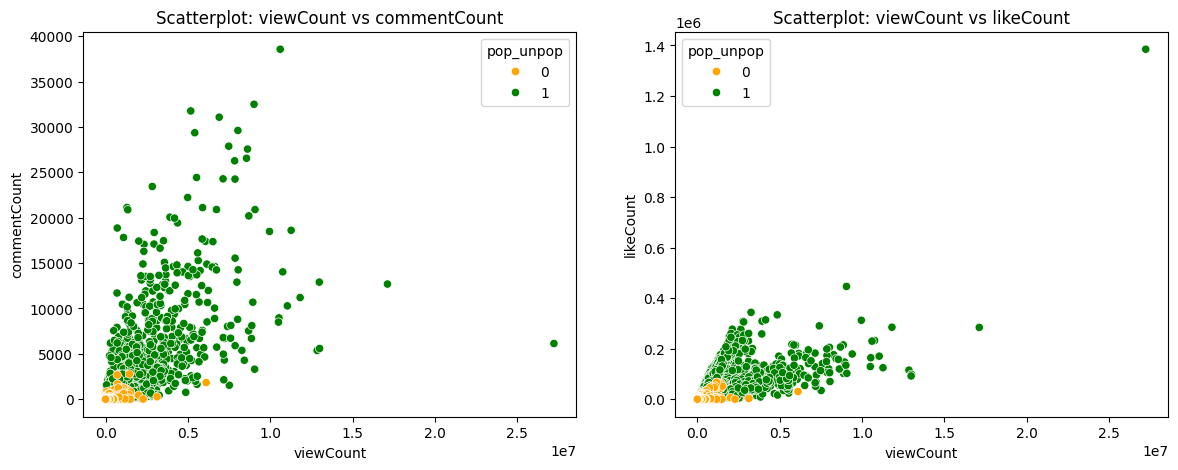

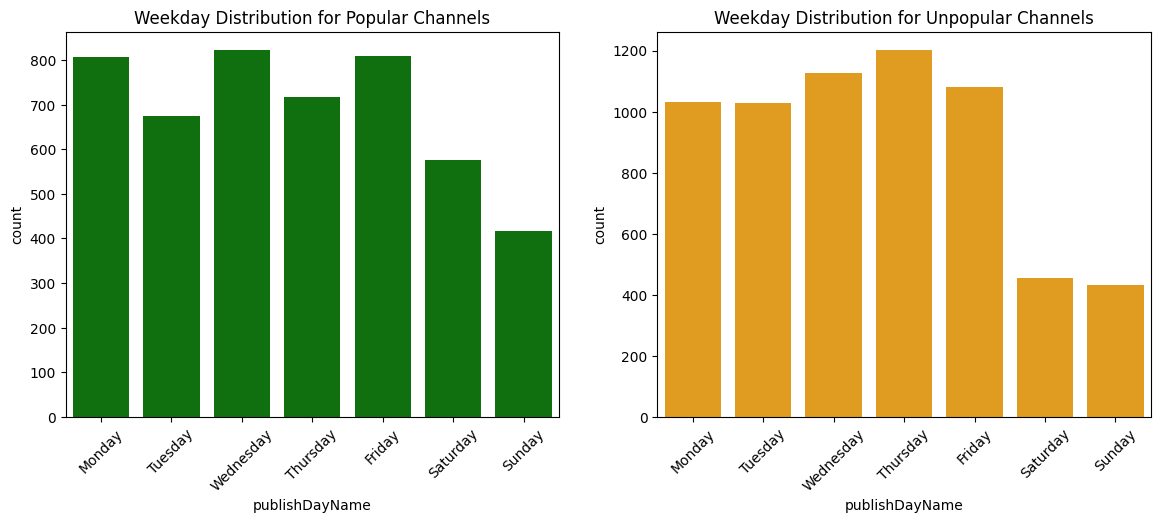

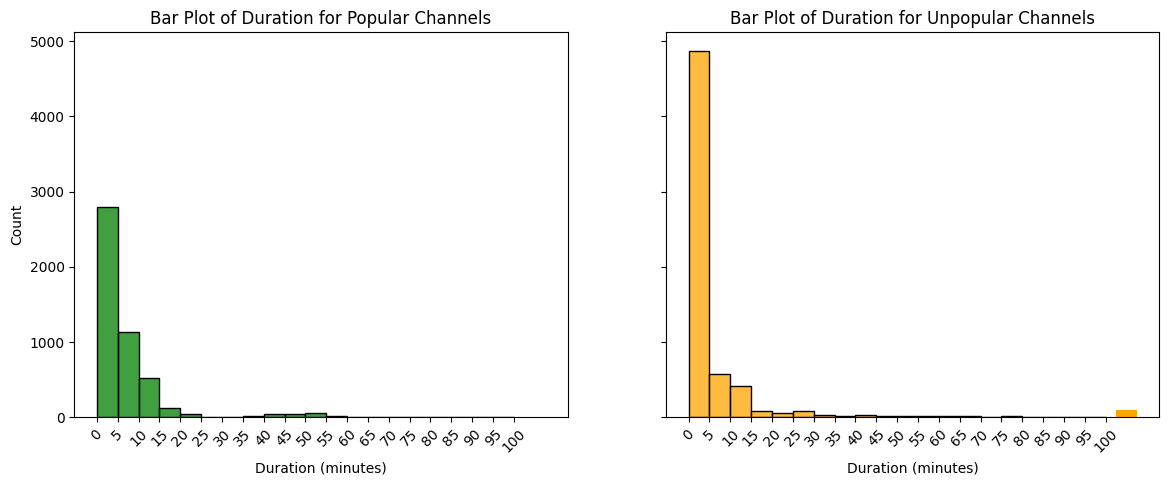

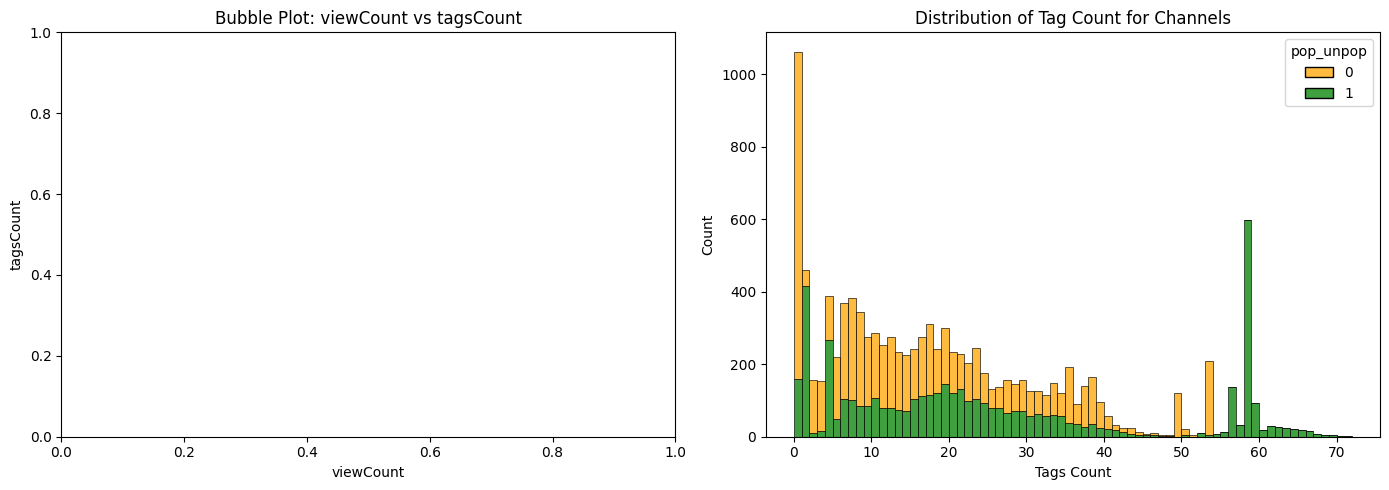

In [65]:
df = cleaned_dataframe

# 1) Scatterplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatterplot: viewCount vs commentCount
sns.scatterplot(data=df, x='viewCount', y='commentCount', hue='pop_unpop', palette={0: 'orange', 1: 'green'}, ax=axes[0])
axes[0].set_title('Scatterplot: viewCount vs commentCount')

# Scatterplot: viewCount vs likeCount
sns.scatterplot(data=df, x='viewCount', y='likeCount', hue='pop_unpop', palette={0: 'orange', 1: 'green'}, ax=axes[1])
axes[1].set_title('Scatterplot: viewCount vs likeCount')

# 2) Weekday distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Popular Channels
sns.countplot(data=df[df['pop_unpop'] == 1], x='publishDayName', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0], palette=['green'])
axes[0].set_title('Weekday Distribution for Popular Channels')
axes[0].tick_params(axis='x', rotation=45)  # Change rotation angle as needed

# Unpopular Channels
sns.countplot(data=df[df['pop_unpop'] == 0], x='publishDayName', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[1], palette=['orange'])
axes[1].set_title('Weekday Distribution for Unpopular Channels')
axes[1].tick_params(axis='x', rotation=45)  # Change rotation angle as needed

# 3) Bar plot of duration
# Convert duration from seconds to minutes
df['durationMins'] = df['durationSecs'] / 60

# Calculate the number of bars for each 5-minute interval
num_bars_within_range = 100 // 5
bar_values_within_range = [i * 5 for i in range(num_bars_within_range + 1)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Popular Channels
sns.histplot(df[df['pop_unpop'] == 1], x='durationMins', bins=bar_values_within_range, kde=False, ax=axes[0], color='green')
axes[0].set_title('Bar Plot of Duration for Popular Channels')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Count')

# Set x-axis ticks and labels
axes[0].set_xticks(range(0, 101, 5))
axes[0].set_xticklabels([str(i) for i in range(0, 101, 5)], rotation =45)

# Add a single bar for durations beyond 100 minutes
axes[0].bar(105, df[(df['pop_unpop'] == 1) & (df['durationMins'] > 100)].shape[0], color='green', width=5)

# Unpopular Channels
sns.histplot(df[df['pop_unpop'] == 0], x='durationMins', bins=bar_values_within_range, kde=False, ax=axes[1], color='orange')
axes[1].set_title('Bar Plot of Duration for Unpopular Channels')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Count')

# Set x-axis ticks and labels
axes[1].set_xticks(range(0, 101, 5))
axes[1].set_xticklabels([str(i) for i in range(0, 101, 5)], rotation = 45)

# Add a single bar for durations beyond 100 minutes
axes[1].bar(105, df[(df['pop_unpop'] == 0) & (df['durationMins'] > 100)].shape[0], color='orange', width=5)

# # 4) ViewCount vs Tags Distribution
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Scatterplot: viewCount vs tagsCount
# sns.scatterplot(data=df, x='viewCount', y='tagsCount', hue='pop_unpop', palette={0: 'orange', 1: 'green'}, ax=axes[0])
# axes[0].set_title('Scatterplot: viewCount vs tagsCount')

# # Distribution of tag count
# sns.histplot(data=df, x='tagsCount', hue='pop_unpop', multiple='stack', bins=range(0, max(df['tagsCount']) + 1), ax=axes[1], palette={0: 'orange', 1: 'green'})
# axes[1].set_title('Distribution of Tag Count for Channels')
# axes[1].set_xlabel('Tags Count')
# axes[1].set_ylabel('Count')
# 4) Bubble plot: viewCount vs tagsCount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define tag count ranges
tag_ranges = [(0, 10), (10, 20), (20, 30)]

for tag_range in tag_ranges:
    min_tag, max_tag = tag_range
    subset_df = df[(df['tagsCount'] >= min_tag) & (df['tagsCount'] < max_tag)]
    size = subset_df.groupby('pop_unpop').size().reset_index(name='count')
    color = 'green' if tag_range[0] == 0 else 'orange'  # Use green for 0-10 range and orange for others
    sns.scatterplot(data=subset_df, x='viewCount', y='tagsCount', hue='pop_unpop', palette={0: 'orange', 1: 'green'}, size=size['count'], sizes=(20, 200), ax=axes[0], color=color)

axes[0].set_title('Bubble Plot: viewCount vs tagsCount')
axes[0].set_xlabel('viewCount')
axes[0].set_ylabel('tagsCount')

# Distribution of tag count
sns.histplot(data=df, x='tagsCount', hue='pop_unpop', multiple='stack', bins=range(0, max(df['tagsCount']) + 1), ax=axes[1], palette={0: 'orange', 1: 'green'})
axes[1].set_title('Distribution of Tag Count for Channels')
axes[1].set_xlabel('Tags Count')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()